<a href="https://colab.research.google.com/github/palakshahu/mlprojects/blob/main/simple_lin_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Linear Regression With One Variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files
files.upload()

Saving ex1data1.csv to ex1data1 (1).csv


{'ex1data1 (1).csv': b'6.1101,17.592\r\n5.5277,9.1302\r\n8.5186,13.662\r\n7.0032,11.854\r\n5.8598,6.8233\r\n8.3829,11.886\r\n7.4764,4.3483\r\n8.5781,12\r\n6.4862,6.5987\r\n5.0546,3.8166\r\n5.7107,3.2522\r\n14.164,15.505\r\n5.734,3.1551\r\n8.4084,7.2258\r\n5.6407,0.71618\r\n5.3794,3.5129\r\n6.3654,5.3048\r\n5.1301,0.56077\r\n6.4296,3.6518\r\n7.0708,5.3893\r\n6.1891,3.1386\r\n20.27,21.767\r\n5.4901,4.263\r\n6.3261,5.1875\r\n5.5649,3.0825\r\n18.945,22.638\r\n12.828,13.501\r\n10.957,7.0467\r\n13.176,14.692\r\n22.203,24.147\r\n5.2524,-1.22\r\n6.5894,5.9966\r\n9.2482,12.134\r\n5.8918,1.8495\r\n8.2111,6.5426\r\n7.9334,4.5623\r\n8.0959,4.1164\r\n5.6063,3.3928\r\n12.836,10.117\r\n6.3534,5.4974\r\n5.4069,0.55657\r\n6.8825,3.9115\r\n11.708,5.3854\r\n5.7737,2.4406\r\n7.8247,6.7318\r\n7.0931,1.0463\r\n5.0702,5.1337\r\n5.8014,1.844\r\n11.7,8.0043\r\n5.5416,1.0179\r\n7.5402,6.7504\r\n5.3077,1.8396\r\n7.4239,4.2885\r\n7.6031,4.9981\r\n6.3328,1.4233\r\n6.3589,-1.4211\r\n6.2742,2.4756\r\n5.6397,4.6042\r

In [4]:
data = pd.read_csv('ex1data1.csv', header=None)
data.columns = ['Population', 'Profit']

In [5]:

# Display dataset information
print(data.info())
print("any duplicate rows:",data.duplicated().sum())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB
None
any duplicate rows: 0
       Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000


In [6]:
x_train = data['Population']
y_train = data['Profit']

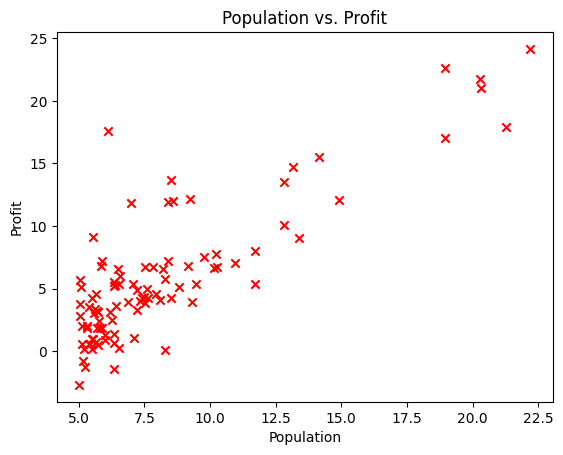

In [7]:

plt.scatter(x_train, y_train, marker='x', c='r')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Population vs. Profit')
plt.show()

In [8]:
#temporary column with 1
data['temp_column'] = 1

In [9]:
x = data[['temp_column', 'Population']].values  # Shape: (m, 2)
y = data['Profit'].values.reshape(-1, 1)  # Shape: (m, 1)
theta =np.zeros((2, 1)) #theta0, theta1

In [10]:
def computeCost(x, y, theta):
    m = len(y)
    cost=0
    for i in range (m):
      y_hat = np.dot(x[i], theta)
      cost =cost+  (y_hat- y[i]) ** 2

    total_cost = (1 / (2 * m)) * cost
    return total_cost
print(computeCost(x, y, theta))

[32.07273388]


In [11]:

def compute_gradient(x, y, theta):
    m = len(y)
    y_hat = np.dot(x, theta)
    error = y_hat - y
    dj_dw = (1 / m) * np.dot(x.T, error)  # Gradient for weights
    return dj_dw

In [12]:
def gradientDescent(x, y, theta, alpha, iters, cost_funct, gradient_funct):
    j = []  # List to store the cost at each iteration
    for i in range(iters):
        dj_dw = gradient_funct(x, y, theta)
        theta = theta - alpha * dj_dw  # Update theta
        cost = cost_funct(x, y, theta)  # Compute cost
        j.append(cost)  # Track cost
        print(f'Iteration {i+1}: Cost: {cost:.4f}, Theta: {theta.flatten()}')
    return theta, j

In [15]:
import numpy as np

def gradientDescent(x, y, theta, alpha, iters, cost_funct, gradient_funct):
    j = []  # List to store the cost at each iteration
    for i in range(iters):
        dj_dw = gradient_funct(x, y, theta)
        theta = theta - alpha * dj_dw  # Update theta
        cost = cost_funct(x, y, theta)  # Compute cost
        j.append(cost)  # Track cost
        # Convert cost and theta to strings before formatting
        print(f'Iteration {i+1}: Cost: {cost.item():.4f}, Theta: {theta.flatten()}')
    return theta, j

In [16]:
alpha = 0.001
iters = 1000

# Run gradient descent
theta, cost_history = gradientDescent(x, y, theta, alpha, iters, computeCost, compute_gradient)

# Print the optimized parameters
print("Theta found by gradient descent:", theta.flatten())

Iteration 1: Cost: 27.9476, Theta: [0.00583914 0.06532885]
Iteration 2: Cost: 24.4729, Theta: [0.01113936 0.12529203]
Iteration 3: Cost: 21.5460, Theta: [0.015945   0.18033072]
Iteration 4: Cost: 19.0806, Theta: [0.02029673 0.23084983]
Iteration 5: Cost: 17.0038, Theta: [0.02423188 0.27722097]
Iteration 6: Cost: 15.2545, Theta: [0.02778471 0.31978522]
Iteration 7: Cost: 13.7809, Theta: [0.03098668 0.35885557]
Iteration 8: Cost: 12.5396, Theta: [0.03386664 0.39471932]
Iteration 9: Cost: 11.4939, Theta: [0.03645107 0.42764011]
Iteration 10: Cost: 10.6131, Theta: [0.0387643  0.45785994]
Iteration 11: Cost: 9.8711, Theta: [0.04082863 0.48560087]
Iteration 12: Cost: 9.2460, Theta: [0.04266453 0.51106675]
Iteration 13: Cost: 8.7193, Theta: [0.04429079 0.53444461]
Iteration 14: Cost: 8.2757, Theta: [0.04572468 0.55590616]
Iteration 15: Cost: 7.9019, Theta: [0.046982   0.57560895]
Iteration 16: Cost: 7.5870, Theta: [0.0480773 0.5936976]
Iteration 17: Cost: 7.3216, Theta: [0.04902391 0.61030482

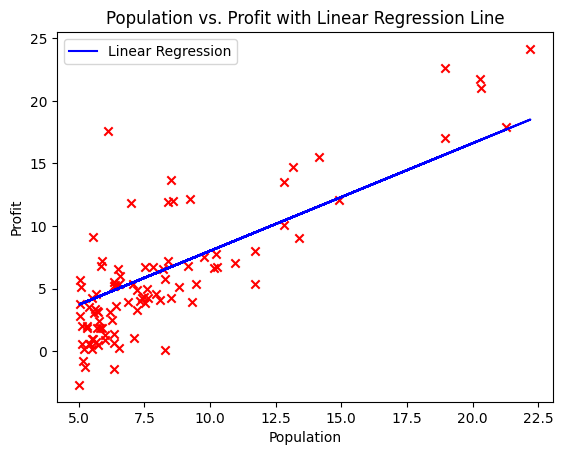

In [17]:


plt.scatter(x_train, y_train, marker='x', c='r')
plt.plot(x_train, np.dot(x, theta), label='Linear Regression', color='blue')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Population vs. Profit with Linear Regression Line')
plt.legend()
plt.show()

In [18]:
final_cost = computeCost(x, y, theta)
print("Final cost:", final_cost)

Final cost: [5.48026933]


In [19]:

#  predict the profit for a population of 7 (in 10,000s)
population_to_predict = 7

# Prepare the input vector (including the bias term)
input_vector = np.array([1, population_to_predict])  # Shape: (1, 2)

# Calculate the predicted profit
predicted_profit = np.dot(input_vector, theta)

print(f"Predicted profit for a population of {population_to_predict} (in 10,000s): ${predicted_profit[0] * 10000:.2f}")


Predicted profit for a population of 7 (in 10,000s): $54406.59


In [20]:
def computeCost1(x, y, theta):
    m =50
    total_cost=0
    cost=0
    for i in range (m):
      y_hat = np.dot(x, theta)
      cost =(np.square(y_hat - y[i]))

      total_cost=cost+(1/2*m)*cost
      print(f'iteration:{i}, cost function{cost}')
    return total_cost
cost=computeCost1(x, y, theta)
print(cost)

iteration:0, cost function[[1.66829242e+02]
 [1.80011362e+02]
 [1.17636908e+02]
 [1.47588259e+02]
 [1.72433154e+02]
 [1.20180650e+02]
 [1.37871275e+02]
 [1.16530142e+02]
 [1.58582874e+02]
 [1.91088495e+02]
 [1.75815317e+02]
 [3.59238290e+01]
 [1.75284617e+02]
 [1.19700568e+02]
 [1.77414518e+02]
 [1.83448063e+02]
 [1.61208750e+02]
 [1.89298565e+02]
 [1.59810525e+02]
 [1.46179861e+02]
 [1.65079748e+02]
 [5.55535283e-01]
 [1.80879629e+02]
 [1.62067677e+02]
 [1.79154389e+02]
 [3.55029714e+00]
 [5.10079461e+01]
 [7.65654824e+01]
 [4.68248338e+01]
 [8.39302083e-01]
 [1.86416988e+02]
 [1.56356654e+02]
 [1.04426733e+02]
 [1.71711552e+02]
 [1.23440127e+02]
 [1.28801015e+02]
 [1.25650187e+02]
 [1.78203064e+02]
 [5.09097730e+01]
 [1.61470776e+02]
 [1.82808324e+02]
 [1.50119747e+02]
 [6.56855359e+01]
 [1.74382226e+02]
 [1.30930456e+02]
 [1.45716738e+02]
 [1.90717965e+02]
 [1.73753978e+02]
 [6.57970427e+01]
 [1.79690910e+02]
 [1.36586477e+02]
 [1.85121290e+02]
 [1.38933025e+02]
 [1.35325692e+02]
 [

In [21]:
def gradientDescent1(x, y, theta, alpha, iters):
    m = len(y)
    for i in range(iters):
        y_hat = np.dot(x, theta)  # Predicted values
        gradient = (1 / m) * np.dot(x.T, (y_hat - y))  # Compute the gradient
        theta = theta-alpha * gradient  # Update theta
        print(f'iteration:{i}, alpha:{alpha}, theta:{theta}')
    return theta
val=gradientDescent1(x, y, theta,alpha,iters)
print(val)

iteration:0, alpha:0.001, theta:[[-0.57666862]
 [ 0.85959282]]
iteration:1, alpha:0.001, theta:[[-0.57726692]
 [ 0.85965292]]
iteration:2, alpha:0.001, theta:[[-0.57786512]
 [ 0.85971302]]
iteration:3, alpha:0.001, theta:[[-0.5784632]
 [ 0.8597731]]
iteration:4, alpha:0.001, theta:[[-0.57906118]
 [ 0.85983317]]
iteration:5, alpha:0.001, theta:[[-0.57965905]
 [ 0.85989324]]
iteration:6, alpha:0.001, theta:[[-0.58025682]
 [ 0.85995329]]
iteration:7, alpha:0.001, theta:[[-0.58085447]
 [ 0.86001333]]
iteration:8, alpha:0.001, theta:[[-0.58145202]
 [ 0.86007336]]
iteration:9, alpha:0.001, theta:[[-0.58204946]
 [ 0.86013338]]
iteration:10, alpha:0.001, theta:[[-0.58264679]
 [ 0.86019339]]
iteration:11, alpha:0.001, theta:[[-0.58324401]
 [ 0.86025339]]
iteration:12, alpha:0.001, theta:[[-0.58384113]
 [ 0.86031337]]
iteration:13, alpha:0.001, theta:[[-0.58443814]
 [ 0.86037335]]
iteration:14, alpha:0.001, theta:[[-0.58503504]
 [ 0.86043331]]
iteration:15, alpha:0.001, theta:[[-0.58563183]
 [ 0